<a href="https://colab.research.google.com/github/PrajaktaPatil1/benign_malignant/blob/master/benign_malignant(with_LBP_feature).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
pip install opencv-python scikit-image scikit-learn


Importing Libraries

In [39]:
import os
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
from google.colab import files
uploaded = files.upload()

Saving archive (update1).zip to archive (update1) (1).zip


Extracte the folder and Saved

In [41]:
import os
import zipfile

# Path to the zip file
zip_file_path = '/content/archive (update1).zip'

# Directory where you want to extract the files
extracted_dir = '/content/extracted_data1'

# Ensure the directory exists
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
for file_name in extracted_files:
    print(file_name)

# Destination directory to save the extracted files
save_dir = '/content/saved_files'


Contents of the extracted directory:
archive (4)


In [42]:
import os

def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                total_images += 1
    return total_images

# Example usage
folder_path = "/content/extracted_data1/archive (4)"
total_images = count_images(folder_path)
print("Total images:", total_images)


Total images: 523


In [6]:
import os

def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                total_images += 1
    return total_images

# Example usage
folder_path = "/content/extracted_data1/archive (4)/train/benign"
total_images = count_images(folder_path)
print("Total images:", total_images)


Total images: 176


# Step 1: Data Preprocessing

In [43]:
import cv2

In [44]:
def extract_lbp_features(image):
    gray = rgb2gray(image)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7) # Normalize
    return hist

def load_data(folder_path):
    X = []
    y = []
    for label, class_name in enumerate(['benign', 'malignant']):
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            image = cv2.imread(img_path)
            features = extract_lbp_features(image)
            X.append(features)
            y.append(label)
    return np.array(X), np.array(y)

In [162]:
train_folder = "/content/extracted_data1/archive (4)/train"
test_folder = "/content/extracted_data1/archive (4)/test"

In [163]:
X_train, y_train = load_data(os.path.join(train_folder))

In [164]:
X_test, y_test = load_data(os.path.join(test_folder))

In [48]:
# Assuming y_train is a numpy array containing the training labels
unique_labels_train = np.unique(y_train)

print("Unique labels in y_train:", unique_labels_train)

Unique labels in y_train: [0 1]


# Statistical analysis

In [49]:
# Statistical analysis
mean_values = np.mean(X_train, axis=0)
std_dev_values = np.std(X_train, axis=0)



In [50]:
print(mean_values)
print(std_dev_values)

[0.05165806 0.0257387  0.02203132 0.01804123 0.01582478 0.01510066
 0.01538204 0.01655329 0.01833948 0.02085053 0.02384772 0.02751648
 0.0295955  0.02848307 0.02280842 0.02081935 0.01651209 0.01577292
 0.0135187  0.01339248 0.01420537 0.01662524 0.01994008 0.02214983
 0.04806313 0.44722952]
[0.00736259 0.00466074 0.0027437  0.00225053 0.00263093 0.00306273
 0.00361745 0.0043598  0.00522089 0.00622204 0.007455   0.00954166
 0.0121662  0.00865143 0.00659441 0.00503596 0.00391797 0.00311119
 0.00266224 0.00229552 0.00224432 0.00229227 0.00246287 0.00413866
 0.00684781 0.05321009]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-52-0ecad913e4ff>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


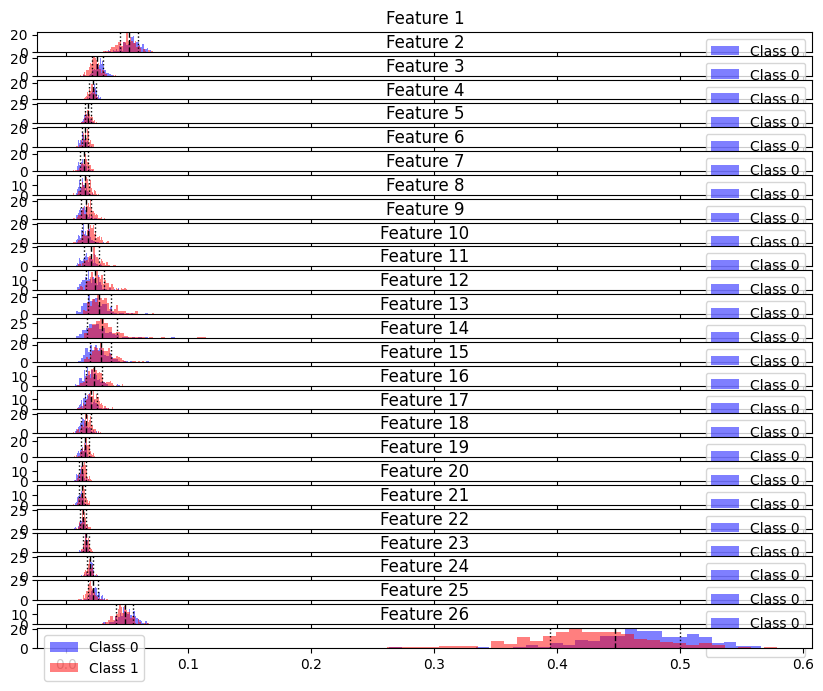

In [52]:
# Visualization
num_features = X_train.shape[1]
fig, axes = plt.subplots(num_features, 1, figsize=(10, 8), sharex=True)

for i in range(num_features):
    # Split histogram for each feature
    axes[i].hist(X_train[y_train == 0, i], color='blue', alpha=0.5, label='Class 0', bins=30)
    axes[i].hist(X_train[y_train == 1, i], color='red', alpha=0.5, label='Class 1', bins=30)
    axes[i].axvline(mean_values[i], color='k', linestyle='dashed', linewidth=1)
    axes[i].axvline(mean_values[i] + std_dev_values[i], color='k', linestyle='dotted', linewidth=1)
    axes[i].axvline(mean_values[i] - std_dev_values[i], color='k', linestyle='dotted', linewidth=1)
    axes[i].set_title(f'Feature {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()

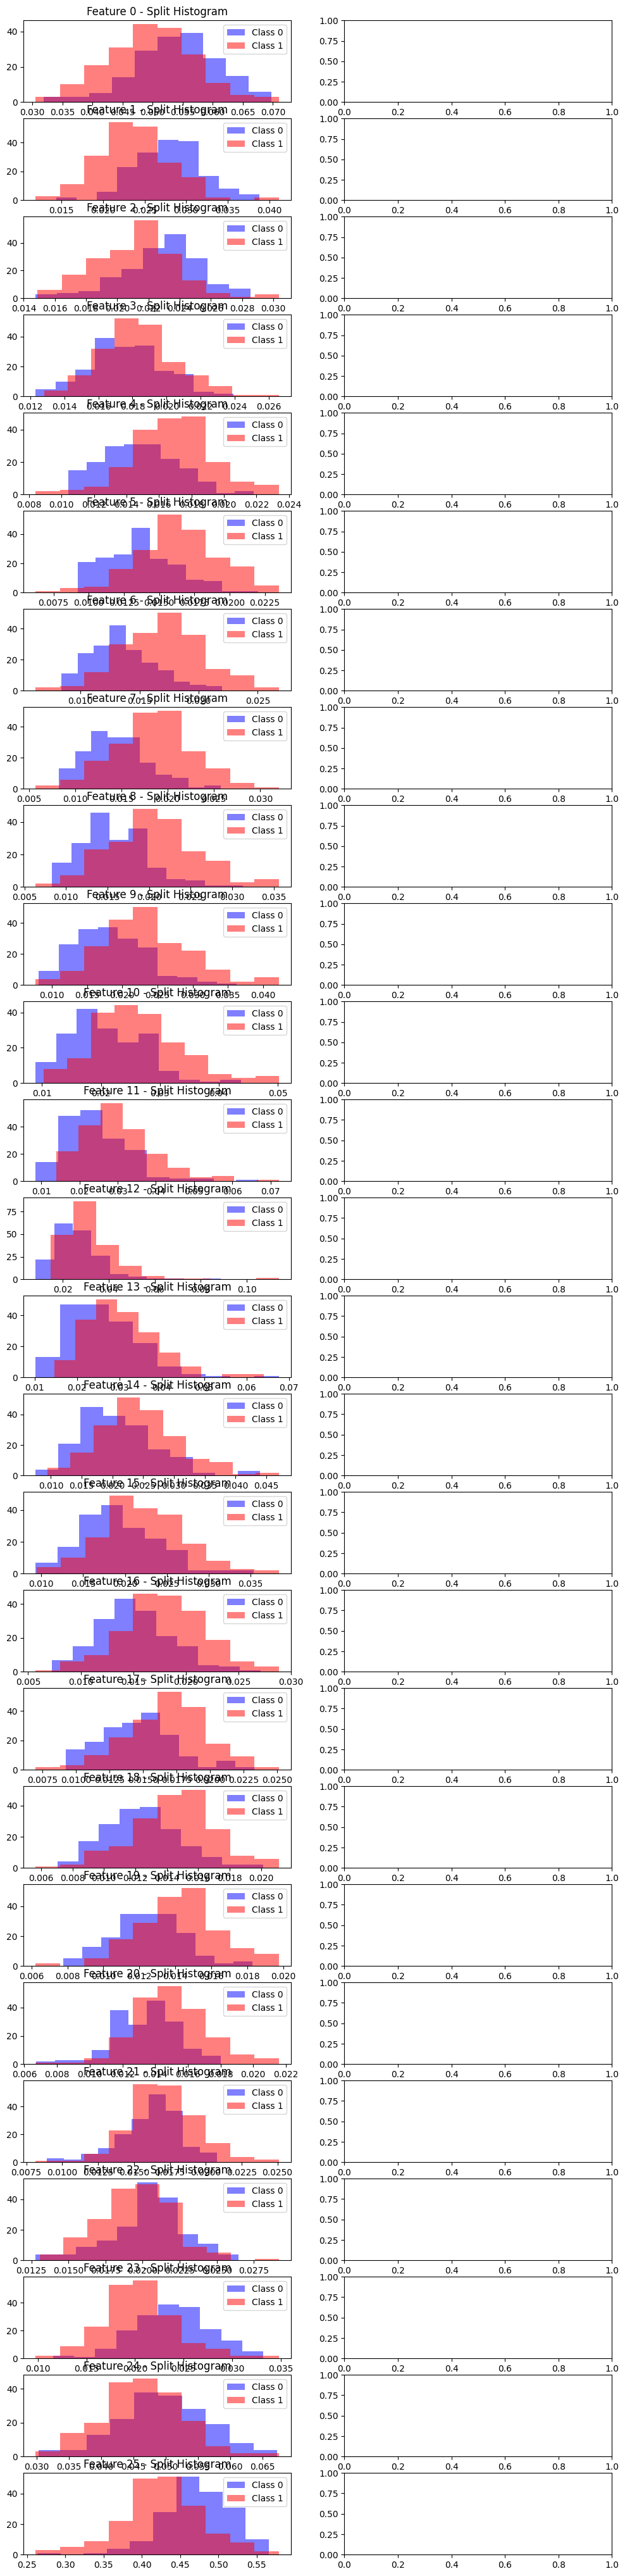

In [53]:

# Visualization
num_features = X_train.shape[1]  # Number of features

# Split Histogram
fig, axs = plt.subplots(num_features, 2, figsize=(12, 2*num_features))

for i in range(num_features):
    axs[i, 0].hist(X_train[y_train == 0, i], color='blue', alpha=0.5, label='Class 0')
    axs[i, 0].hist(X_train[y_train == 1, i], color='red', alpha=0.5, label='Class 1')
    axs[i, 0].set_title(f'Feature {i} - Split Histogram')
    axs[i, 0].legend()

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Bar Chart for Mean
axs[-1, 1].bar(feature_names, mean_values, color='blue', alpha=0.5, label='Mean')
axs[-1, 1].set_title('Mean')

# Bar Chart for Standard Deviation
axs[-1, 0].bar(feature_names, std_dev_values, color='red', alpha=0.5, label='Standard Deviation')
axs[-1, 0].set_title('Standard Deviation')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Inferential Statistics

In [56]:
from scipy import stats

def t_test_cohen_d(X_train, y_train):
    t_scores = []
    cohen_d_values = []
    for i in range(X_train.shape[1]):
        feature_class_0 = X_train[y_train == 0, i]
        feature_class_1 = X_train[y_train == 1, i]
        t_statistic, p_value = stats.ttest_ind(feature_class_0, feature_class_1)
        t_scores.append(t_statistic)
        pooled_std_dev = np.sqrt((np.var(feature_class_0) + np.var(feature_class_1)) / 2)
        cohen_d = (np.mean(feature_class_0) - np.mean(feature_class_1)) / pooled_std_dev
        cohen_d_values.append(cohen_d)
    return t_scores, cohen_d_values

In [57]:
# Calculate t-test scores and Cohen's d values
t_scores, cohen_d_values = t_test_cohen_d(X_train, y_train)

In [58]:
# Print t-test scores and Cohen's d values for each feature
for i in range(len(t_scores)):
    print(f"Feature {i+1}: t-score = {t_scores[i]}, Cohen's d = {cohen_d_values[i]}")

Feature 1: t-score = 5.658568649367275, Cohen's d = 0.5896786999555768
Feature 2: t-score = 9.793579660703601, Cohen's d = 1.0219058820083324
Feature 3: t-score = 5.72159004546318, Cohen's d = 0.5962428847881445
Feature 4: t-score = -3.6689969517880154, Cohen's d = -0.3822054184677994
Feature 5: t-score = -8.219560264659556, Cohen's d = -0.8580430831425145
Feature 6: t-score = -9.790092226876858, Cohen's d = -1.023531255379557
Feature 7: t-score = -10.443533373912086, Cohen's d = -1.0946566478663702
Feature 8: t-score = -10.115315639932785, Cohen's d = -1.060340655998006
Feature 9: t-score = -9.609634273728341, Cohen's d = -1.007688547650525
Feature 10: t-score = -8.5302575985034, Cohen's d = -0.892789814245918
Feature 11: t-score = -7.705684575093113, Cohen's d = -0.8055156257894697
Feature 12: t-score = -6.145154186312386, Cohen's d = -0.6417182979093817
Feature 13: t-score = -4.917860323368467, Cohen's d = -0.5149782682057705
Feature 14: t-score = -5.050836749423163, Cohen's d = -0.

# Step 2: Model Training

#Implementing Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
# Step 1: Train Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Step 5: Evaluate model
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.6423841059602649


In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
accuracy_score(y_pred_lr,y_test)
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53        46
           1       0.81      0.63      0.71       105

    accuracy                           0.64       151
   macro avg       0.63      0.65      0.62       151
weighted avg       0.70      0.64      0.66       151



In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_pred_lr,y_test)

array([[31, 15],
       [39, 66]])

Model selection with GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Define hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [69]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

In [70]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [71]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 100, 'penalty': 'l2'}


In [72]:
# Initialize Logistic Regression with best hyperparameters
lr_tuned = LogisticRegression(**best_params)

In [73]:
# Fit the model with tuned hyperparameters
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=100)

In [74]:
y_pred_lr = lr_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.7086092715231788


In [75]:
from sklearn.metrics import accuracy_score, classification_report

In [76]:
accuracy_score(y_pred_lr,y_test)
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        66
           1       0.75      0.72      0.73        85

    accuracy                           0.71       151
   macro avg       0.71      0.71      0.71       151
weighted avg       0.71      0.71      0.71       151



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_pred_lr,y_test)

array([[46, 20],
       [24, 61]])

#Implementing a Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc=RandomForestClassifier()

In [106]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)


Accuracy: 0.847682119205298


In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [109]:
accuracy_score(y_pred_rfc,y_test)
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        71
           1       0.85      0.86      0.86        80

    accuracy                           0.85       151
   macro avg       0.85      0.85      0.85       151
weighted avg       0.85      0.85      0.85       151



In [110]:
confusion_matrix(y_pred_rfc,y_test)

array([[59, 12],
       [11, 69]])

Model Selection GridSearchCV

In [111]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [112]:
# Create GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')


In [113]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [114]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [115]:
# Print the best estimator found
best_random_forest = grid_search.best_estimator_
print("\nBest Estimator:", best_random_forest)


Best Estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)


In [116]:
y_pred_brf = best_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_brf)
print("Accuracy:", accuracy)

Accuracy: 0.7284768211920529


In [117]:
from sklearn.metrics import accuracy_score, classification_report

In [118]:
accuracy_score(y_pred_brf,y_test)
print(classification_report(y_pred_brf,y_test))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        67
           1       0.77      0.74      0.75        84

    accuracy                           0.73       151
   macro avg       0.73      0.73      0.73       151
weighted avg       0.73      0.73      0.73       151



In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_pred_brf,y_test)

array([[48, 19],
       [22, 62]])

#Implementing a KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.7152317880794702


In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69        67
           1       0.75      0.73      0.74        84

    accuracy                           0.72       151
   macro avg       0.71      0.71      0.71       151
weighted avg       0.72      0.72      0.72       151



In [ ]:
confusion_matrix(y_pred_knn,y_test)

array([[47, 20],
       [23, 61]])

#Implementing a Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtc=DecisionTreeClassifier()

In [84]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred_dtc = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

Accuracy: 0.8211920529801324


In [86]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        69
           1       0.84      0.83      0.83        82

    accuracy                           0.82       151
   macro avg       0.82      0.82      0.82       151
weighted avg       0.82      0.82      0.82       151



In [87]:
confusion_matrix(y_pred_dtc,y_test)

array([[56, 13],
       [14, 68]])

model selection with gridsearchCV

In [88]:
# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [90]:
# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')


In [91]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [92]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [93]:

# Print the best estimator found
best_decision_tree = grid_search.best_estimator_
print("\nBest Estimator:", best_decision_tree)


Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)


In [96]:
# Evaluate the best model on the test set
y_pred_bdt = best_decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bdt)
print("Accuracy:", accuracy)

Accuracy: 0.7483443708609272


In [97]:
from sklearn.metrics import accuracy_score, classification_report

In [98]:
accuracy_score(y_pred_bdt,y_test)
print(classification_report(y_pred_bdt,y_test))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        84
           1       0.68      0.82      0.74        67

    accuracy                           0.75       151
   macro avg       0.75      0.76      0.75       151
weighted avg       0.76      0.75      0.75       151



In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_pred_bdt,y_test)

array([[58, 26],
       [12, 55]])

#Implementing a Naive Bayes classifier

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
nb=GaussianNB()

In [123]:
nb.fit(X_train, y_train)

GaussianNB()

In [124]:
y_pred_nb = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.6754966887417219


In [125]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66        75
           1       0.67      0.71      0.69        76

    accuracy                           0.68       151
   macro avg       0.68      0.68      0.67       151
weighted avg       0.68      0.68      0.68       151



In [126]:
confusion_matrix(y_pred_nb,y_test)

array([[48, 27],
       [22, 54]])

In [128]:
# Define the hyperparameters to tune (in this case, priors)
param_grid = {
    'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]] }

In [130]:
# Create GridSearchCV object
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

In [131]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of prio

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]]},
             scoring='accuracy')

In [132]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'priors': None}


In [133]:
# Print the best estimator found
best_naive_bayes = grid_search.best_estimator_
print("\nBest Estimator:", best_naive_bayes)


Best Estimator: GaussianNB()


In [135]:
# Evaluate the best model on the test set
y_pred_bnb = best_naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bnb)
print("Accuracy:", accuracy)

Accuracy: 0.6754966887417219


In [136]:
accuracy_score(y_pred_bnb,y_test)
print(classification_report(y_pred_bnb,y_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66        75
           1       0.67      0.71      0.69        76

    accuracy                           0.68       151
   macro avg       0.68      0.68      0.67       151
weighted avg       0.68      0.68      0.68       151



In [137]:
confusion_matrix(y_pred_bnb,y_test)

array([[48, 27],
       [22, 54]])

#Implementing a Xgboost

In [138]:
import xgboost as xgb

In [139]:
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [140]:
# Train the classifier
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [141]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [142]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8344370860927153


In [144]:
accuracy_score(y_pred_xgb,y_test)
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        65
           1       0.88      0.83      0.85        86

    accuracy                           0.83       151
   macro avg       0.83      0.84      0.83       151
weighted avg       0.84      0.83      0.84       151



In [145]:
confusion_matrix(y_pred_xgb,y_test)

array([[55, 10],
       [15, 71]])

model selection with GridsearchCV

In [146]:
# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}

In [148]:
# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

In [149]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [150]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}


In [151]:
# Print the best estimator found
best_xgb_classifier = grid_search.best_estimator_
print("\nBest Estimator:", best_xgb_classifier)


Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [155]:
# Evaluate the best model on the test set
y_pred_xgb = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.7483443708609272


In [156]:
accuracy_score(y_pred_xgb,y_test)
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        70
           1       0.77      0.77      0.77        81

    accuracy                           0.75       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.75      0.75      0.75       151



In [158]:
confusion_matrix(y_pred_xgb,y_test)

array([[51, 19],
       [19, 62]])

#Implementing SVM(Support Vector Machine)

In [159]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [160]:
svm_model = Pipeline([
    ("PCA", PCA(n_components=100)),  # Optional: PCA for dimensionality reduction
    ("SVM", SVC(kernel="rbf", C=10))
])

In [165]:
svm_model.fit(X_train, y_train)

ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=26 with svd_solver='full'

In [166]:
pca = PCA()

In [167]:
# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [168]:
# Define and train your SVM model
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)

SVC()

In [169]:
# Step 4: Model Evaluation
y_pred_svm = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5364238410596026


In [170]:
# Step 5: Model Evaluation Metrics
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       151

    accuracy                           0.54       151
   macro avg       0.50      0.27      0.35       151
weighted avg       1.00      0.54      0.70       151



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Implementing a MLP

In [171]:
from sklearn.neural_network import MLPClassifier

In [172]:
# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [173]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [174]:
# Predict on the test set
y_pred = mlp.predict(X_test)

In [175]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7019867549668874
